# Exploratory Data Analysis with Chocolate Rating¶


### Analysing the dataset of [Chocolate Bar Ratings](https://www.kaggle.com/rtatman/chocolate-bar-ratings) to unearth key insights hidden within the data¶
 
### Context
Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.

### Flavors of Cacao Rating System:
+	5= Elite (Transcending beyond the ordinary limits)
+	4= Premium (Superior flavor development, character and style)
+	3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
+	2= Disappointing (Passable but contains at least one significant flaw)
+ 	1= Unpleasant (mostly unpalatable)

Each chocolate is evaluated from a combination of both objective qualities and subjective interpretation. A rating here only represents an experience with one bar from one batch. Batch numbers, vintages and review dates are included in the database when known. 

The database is narrowly focused on plain dark chocolate with an aim of appreciating the flavors of the cacao when made into chocolate. The ratings do not reflect health benefits, social missions, or organic status.
Flavor is the most important component of the Flavors of Cacao ratings. Diversity, balance, intensity and purity of flavors are all considered. It is possible for a straight forward single note chocolate to rate as high as a complex flavor profile that changes throughout. Genetics, terroir, post harvest techniques, processing and storage can all be discussed when considering the flavor component. 

Texture has a great impact on the overall experience and it is also possible for texture related issues to impact flavor. It is a good way to evaluate the makers vision, attention to detail and level of proficiency.
Aftermelt is the experience after the chocolate has melted. Higher quality chocolate will linger and be long lasting and enjoyable. Since the aftermelt is the last impression you get from the chocolate, it receives equal importance in the overall rating.

Overall Opinion is really where the ratings reflect a subjective opinion. Ideally it is my evaluation of whether or not the components above worked together and an opinion on the flavor development, character and style. It is also here where each chocolate can usually be summarized by the most prominent impressions that you would remember about each chocolate.

### Acknowledgements
These ratings were compiled by Brady Brelinski, Founding Member of the Manhattan Chocolate Society. Kindly visit[Flavors of Cacao](http://flavorsofcacao.com/index.html) for updated dataset.


### Hypothesis
Over time, there has been a correlation between cocoa ratings and the proportion of cocoa in a chocolate bar, as the quality of cocoa beans and chocolate bars has improved.

### Hypothetical Questions.
* Which countries produces the best cocoa beans?
* Which countries have the highest-rated chocolate bars?
* Is there relationship between the proportion of cocoa in chocolate bar and the rating?
* What are the top ten companies with the highest rating?
* What is the pattern over the years with respect to rating?
* Is there a correlation between a bean's origin and the average rating of bars?
* Which chocolate beans have the highest ratings?



## 1. Packages

In [274]:
# Import necessary libraries and packages
import pandas as pd # for data processing,
import numpy as np # for data processing
import matplotlib.pyplot as plt # for data-visualization
%matplotlib inline
import seaborn as sns # for data-visualization 

## 2. Data preprocessing

### 2.1 Loading Data

In [2]:
# Importing the dataset
data = pd.read_csv('flavors_of_cacao.csv')
data

,CompanyÂ \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Â,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Â,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Â,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,Â,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Â,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,Â,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,Â,India


###### The Flavors of Cacao dataset consists of 1795 rows and 9 columns. 
###### The Columns are:
|Column |Description  |
|:--- | :--- |
| Company (Maker-if known)| Name of the company manufacturing the bar.|
| Specific Bean Originor Bar Name| The specific geo-region of origin for the bar.|
| REF| A value linked to when the review was entered in the database. Higher = more recent.|
| ReviewDate| Date of publication of the review.|
| CocoaPercent| Cocoa percentage (darkness) of the chocolate bar being reviewed.|
| CompanyLocation| Manufacturer base country.|
| Rating| Expert rating for the bar.|
| BeanType| The variety (breed) of bean used, if provided.|
| Broad BeanOrigin| The broad geo-region of origin for the bean.|




### 2.2 Understanding  basic  information of the data

In [3]:
# function to for data information
def data_info(data):
    print("Basic Information anout Data:\n")
    print('---------------------------------------------')
    
    # Data Types of a DataFrame
    print("Data Types of all Columns",data.dtypes)
    
    print('---------------------------------------------')

    # Shape of the DataFrame
    print("\nNumber of Rows:",data.shape[0])
    print("Number of Columns:",data.shape[1])
    
    print('---------------------------------------------')

    # Summary Statistics
    print("\nSummary Statistics:")
    print(data.describe())
    
    print('---------------------------------------------')

# Getting basic information
data_info(data)

Basic Information anout Data:

---------------------------------------------
Data Types of all Columns CompanyÂ \n(Maker-if known)           object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object
---------------------------------------------

Number of Rows: 1795
Number of Columns: 9
---------------------------------------------

Summary Statistics:
               REF  Review\nDate       Rating
count  1795.000000   1795.000000  1795.000000
mean   1035.904735   2012.325348     3.185933
std     552.886365      2.927210     0.478062
min       5.000000   2006.000000     1.000000
25%     576.000000   2010.000000     2.875000
50%    1069.000000   2013.000000     3.250000


##### The data type information reveals something about our data, and it's not a good one!
The column names are a little messy because they contain the "\n" or "newline" character, which will result in unidentifiable errors we have to go through each column name and rename it explicitly!.

###### Information about the  summary statistics on the dataset:

* The mean review date is 2012 which shows that the data is centered around 2012.
* The most current review date is 2017 and the oldest date is 2006.
* This shows the data was collected for the period 2006-2017(a 11-year period)
* The average rating of chacolate bar 3.18, which is satisfactory (represent a well made bar with special qualities.)
* The rating of the bars is within a range of 1 to 5

### 2.3 Data Cleaning

In [4]:
# function to for identifying missing values and anomalies 

def data_cleaning(data):
    # Missing Value Inspection
    print("Basic Information to check data:\n")
    print('---------------------------------------------')
    
    print("\nMissing Values:")
    print('---------------------------------------------')
    print(data.isna().sum())
    
    print("\nFirst 10 rows of the data frame.:")
    print('---------------------------------------------')
    print('head',data.head(10))
    
    print("\nLast 10 rows of the data frame.:")
    print('---------------------------------------------')
    print(data.tail(10))
    
data_cleaning(data)

Basic Information to check data:

---------------------------------------------

Missing Values:
---------------------------------------------
CompanyÂ \n(Maker-if known)          0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

First 10 rows of the data frame.:
---------------------------------------------
head   CompanyÂ \n(Maker-if known) Specific Bean Origin\nor Bar Name   REF  \
0                    A. Morin                       Agua Grande  1876   
1                    A. Morin                             Kpime  1676   
2                    A. Morin                            Atsane  1676   
3                    A. Morin                             Akata  1680   
4                    A. Morin             

##### The missing values information
BeanType and Broad BeanOrigin both have 1 missing value.

###### The first and last ten rows of the dataset shows a special character (Â) within the BeanType and Broad BeanOrigin columns.
A further probe will give us more information on how to handle it.

In [5]:
#cleaning column names
cols_names = list(data.columns)

# Function to replace newline characters and spaces in the feature names
def replace_columnNames(column_names):
    replace_names = []
    for f in column_names:
        replace_names.append(((f.casefold()).replace("\n","_")).replace(" ","_"))
    return replace_names

print("Column Names before Cleaning:")
print(cols_names)
print("\nColumn Names after Cleaning:")
print(replace_columnNames(cols_names))

Column Names before Cleaning:
['CompanyÂ\xa0\n(Maker-if known)', 'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType', 'Broad Bean\nOrigin']

Column Names after Cleaning:
['companyâ\xa0_(maker-if_known)', 'specific_bean_origin_or_bar_name', 'ref', 'review_date', 'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_bean_origin']


###### The columns now look much better than before. However, the **"companyâ\x..."** column still looks very weird. 
###### We will manually edit and rename the column.
###### Finally, we shall re-assign the new columns names to our dataframe.

In [6]:
# Manually renaming Company name 
new_ColumnNames = replace_columnNames(cols_names)
new_ColumnNames[0] = 'Company'

# Re-assigning column names back to data 
data=data.rename(columns=dict(zip(data.columns,new_ColumnNames)))
data.dtypes

Company                              object
specific_bean_origin_or_bar_name     object
ref                                   int64
review_date                           int64
cocoa_percent                        object
company_location                     object
rating                              float64
bean_type                            object
broad_bean_origin                    object
dtype: object

###### The columns names looks better and easily readable.

In [7]:
# Probing the Â character further
print('Checking special character in bean_type data')
print('----------------------------------------------')
print(data['bean_type'].value_counts().head())
print("Missing Spaces encoded as:")
list(data['bean_type'][0:10])

Checking special character in bean_type data
----------------------------------------------
Â                       887
Trinitario              419
Criollo                 153
Forastero                87
Forastero (Nacional)     52
Name: bean_type, dtype: int64
Missing Spaces encoded as:


['Â\xa0',
 'Â\xa0',
 'Â\xa0',
 'Â\xa0',
 'Â\xa0',
 'Criollo',
 'Â\xa0',
 'Criollo',
 'Criollo',
 'Â\xa0']

###### The information shows that  we actually have 887 instances in which "bean_type" is encoded as a special character Â and space or Â\xa0.

In [8]:
# Replace the Â character spaces with None (Symbolizes no data) 

# Creating a dictionary for the replace character
replace_character = {'Â\xa0':'None'}


# Replacing Â character spaces with None
data.replace(replace_character, regex=True, inplace=True)

# Replacing missing value with None
data['bean_type'] = data['bean_type'].fillna('None')
data['broad_bean_origin'] = data['broad_bean_origin'].fillna('None')


data.head(10)

#

,Company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,None,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,None,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,None,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,None,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,None,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,None,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,None,Peru


###### Thus, we have filled those special characters and  missing values with None.

###### NOTE : Imputing the missing values with None does not offer great advantage from the viewpoint of analysis. However, it helps us maintain a much cleaner dataset which I feel is as important as keeping the visualizations clean.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1795 non-null   object 
 1   specific_bean_origin_or_bar_name  1795 non-null   object 
 2   ref                               1795 non-null   int64  
 3   review_date                       1795 non-null   int64  
 4   cocoa_percent                     1795 non-null   object 
 5   company_location                  1795 non-null   object 
 6   rating                            1795 non-null   float64
 7   bean_type                         1795 non-null   object 
 8   broad_bean_origin                 1795 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


##### From the data information, data has no missing values.



##### __Convert Cocoa_percent to numerical values__
** We change the % notation in 'cocoa_percent' to make it a numerical column for manipulation.**

In [10]:
# Converting % sign to percentage value
data['cocoa_percent']=data['cocoa_percent'].str.replace('%','').astype(float)/100
data.head()

,Company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,None,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,None,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,None,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,None,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,None,Peru


###### The cocoa percent is now a numerical value.

In [11]:
# checking if null values have been filled
null_bool = pd.isnull(data['bean_type'])
data[null_bool]

,Company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin


In [12]:
# Droping the ref column
data.drop(['ref'], axis = 1,inplace = True)
data.head(10)

,Company,specific_bean_origin_or_bar_name,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,2016,0.63,France,3.75,None,Sao Tome
1,A. Morin,Kpime,2015,0.70,France,2.75,None,Togo
2,A. Morin,Atsane,2015,0.70,France,3.00,None,Togo
3,A. Morin,Akata,2015,0.70,France,3.50,None,Togo
4,A. Morin,Quilla,2015,0.70,France,3.50,None,Peru
5,A. Morin,Carenero,2014,0.70,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,2014,0.70,France,3.50,None,Cuba
7,A. Morin,Sur del Lago,2014,0.70,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,2014,0.70,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,2014,0.70,France,4.00,None,Peru


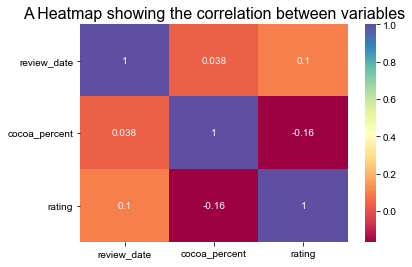

In [13]:
## Checking for the relationship between the variables
# using the correlation matrix and heatmap
# calculate correlation matrix
corr_matrix = data.corr()
# plot the heatmap
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns, annot=True, cmap="Spectral")
sns.set(rc={'figure.figsize':(8, 9)})
plt.title("A Heatmap showing the correlation between variables", fontdict = {'fontsize' : 16});


#### Observations:
It is clear from the heatmap and the seaborn(sns) correlation graphs that:

* There is a No correlation amongst the variables.


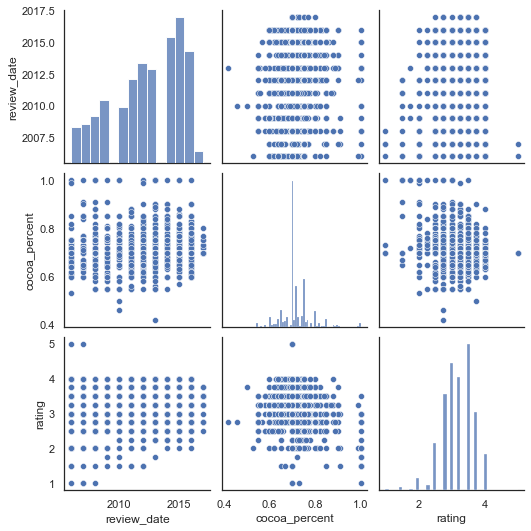

In [160]:
# pair plot to further visualize the relationship between the variables
sns.set(style='white')
sns.pairplot(data);

###### The pair plot further indicate a NO correlation between rating, percentage of cocoa and review date.


# 3. Analyzing Hypothetical Questions

## 3.1. Which countries produces the best cocoa beans?

In [94]:
# countries with the most reviews
countries=data['broad_bean_origin'].value_counts().index.tolist()[:5]

# countries has the top 5 countries in terms of reviews
satisfactory={} # empty dictionary
for i in countries:
    count=0
    best_country=data[data['broad_bean_origin']==i]
    best_rating=best_country[best_country['rating']>=3] # rating more than 4
    for j in best_rating['rating']:
        count+=1
        satisfactory[i]=count

satisfactory = pd.DataFrame(list(satisfactory.items()),columns = ['Country','Number of Chocolate Bars'])

satisfactory

,Country,Number of Chocolate Bars
0,Venezuela,166
1,Ecuador,138
2,Peru,111
3,Madagascar,117
4,Dominican Republic,113


###### Venezuela has the largest number of chocolate bars rated above 3.0

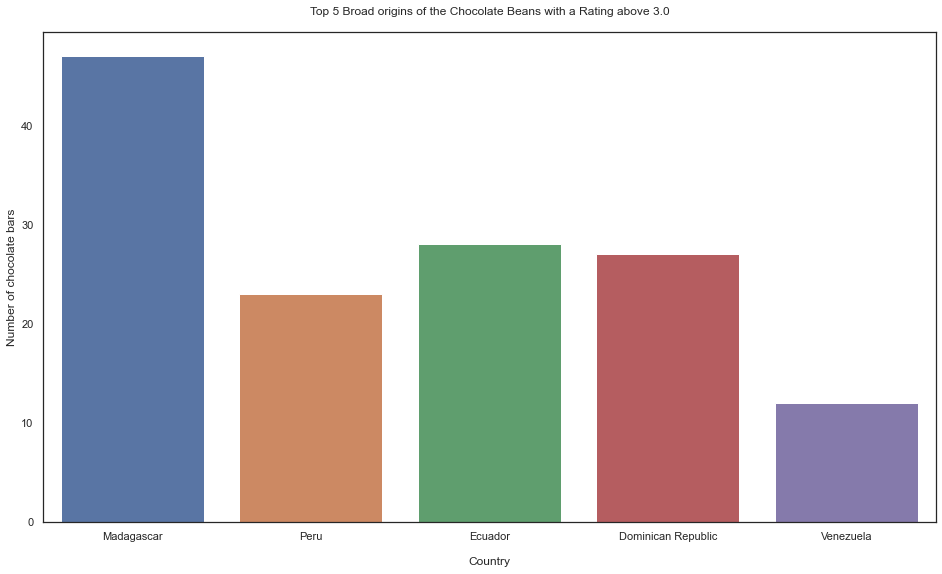

In [159]:
# Code to visualize the countries that give best cocoa beans
satisfactory = pd.DataFrame(satisfactory).reset_index()
sns.set(style='white')
plt.figure(figsize=(16,9))
sns.barplot(x='Country', y='Number of Chocolate Bars', data=satisfactory)
plt.xlabel('\nCountry')
plt.ylabel('Number of chocolate bars')
plt.title("Top 5 Broad origins of the Chocolate Beans with a Rating above 3.0\n")
plt.show()

In [67]:
#Top 10 countries in terms of cocoa beans by rating

# Create dataframe for bean producers and rating
cols = ['broad_bean_origin','rating']
top_10_beans = data[cols]

# Top 10 beans producers by their rating average
top_10_beans = top_10_beans.groupby('broad_bean_origin').aggregate({'rating':'mean'}).sort_values(by=['rating'],ascending=False).head(10)
top_10_beans = pd.DataFrame(top_10_beans).reset_index()

top_10_beans

,broad_bean_origin,rating
0,"Peru, Dom. Rep",4.00
1,"Guat., D.R., Peru, Mad., PNG",4.00
2,"Ven, Bolivia, D.R.",4.00
3,"Venezuela, Java",4.00
4,"Dom. Rep., Madagascar",4.00
5,"Gre., PNG, Haw., Haiti, Mad",4.00
6,"Ven.,Ecu.,Peru,Nic.",3.75
7,"Venez,Africa,Brasil,Peru,Mex",3.75
8,"Dominican Rep., Bali",3.75
9,"PNG, Vanuatu, Mad",3.75


###### This table shows that on the average a combination of regions  produce a top rating cocoa bean type. The highest average rating is 4.0

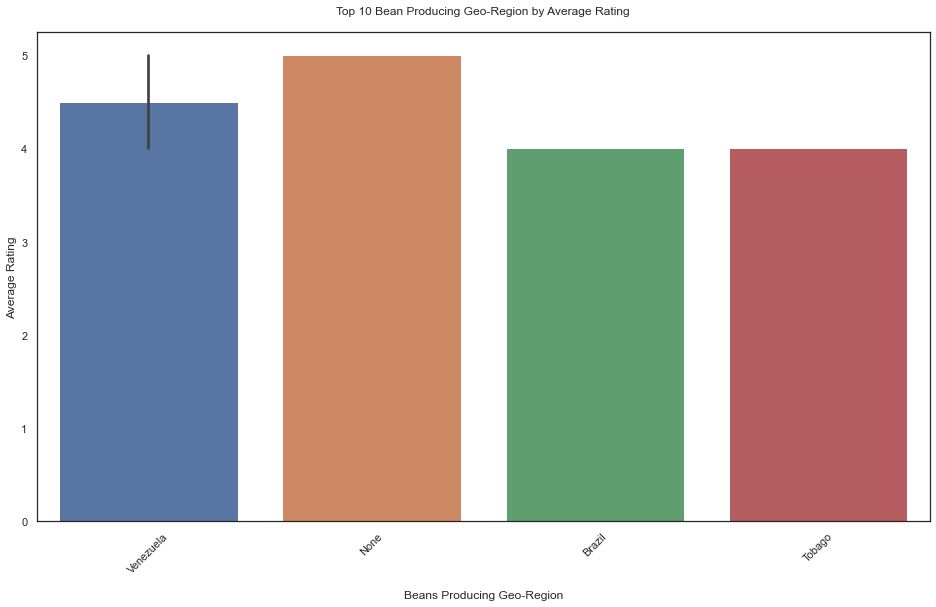

In [158]:
# visualizing the top to bean producers by rating
sns.set(style='white')
plt.figure(figsize=(16,9))
sns.barplot(x='broad_bean_origin', y='rating', data=top_10_beans)
plt.xticks(rotation=45)
plt.xlabel("\nBeans Producing Geo-Region")
plt.ylabel("Average Rating")
plt.title("Top 10 Bean Producing Geo-Region by Average Rating\n")
plt.show()


## 3.2. Which countries have the highest-rated chocolate bars?

In [151]:
#create dataframe for specific_bean_origin_or_bar_name and rating
cols = ['specific_bean_origin_or_bar_name','rating']
review_data = data[cols]

# countries with the most reviews (satisfactory:rating >=3)
most_reviews = review_data[review_data['rating']>=3]

# Top 5 countries with most reviews
most_reviews = pd.DataFrame(most_reviews['specific_bean_origin_or_bar_name'].value_counts()[:5])

# Make index (specific_bean_origin_or_bar_name) a column
most_reviews.reset_index(level=0, inplace=True)

# rename columns
most_reviews.columns=['Country','Number of Reviews']

most_reviews

,Country,Number of Reviews
0,Madagascar,47
1,Ecuador,28
2,Dominican Republic,27
3,Peru,23
4,Sambirano,17


###### The table shows that Madagascar was reviewed satisfactory(>=3) 47 times, at least 19 more than Ecuador the second highest reviewed.

<Figure size 1152x648 with 0 Axes>

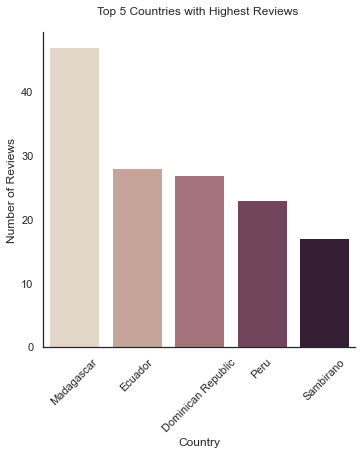

In [157]:
# visualizing the top 5 most rated countries
sns.set(style='white')
plt.figure(figsize=(16,9))
sns.catplot(x='Country', y='Number of Reviews',kind="bar", palette="ch:.25",data=most_reviews)
plt.xticks(rotation=45)
plt.title("Top 5 Countries with Highest Reviews \n")
plt.show()


###### The catplot confirms Madagascar as the  highest-rated chocolate bars (rating >=3) 

## 3.3. Is there relationship between the proportion of cocoa in chocolate bar and the rating?

    Review Year  Average Cocoa Percentage  Average Rating
0          2006                  0.710000        3.125000
1          2007                  0.720390        3.162338
2          2008                  0.726989        2.994624
3          2009                  0.704431        3.073171
4          2010                  0.707793        3.148649
5          2011                  0.709697        3.256061
6          2012                  0.715282        3.178205
7          2013                  0.722663        3.197011
8          2014                  0.722530        3.189271
9          2015                  0.720140        3.246491
10         2016                  0.717580        3.226027
11         2017                  0.715417        3.312500


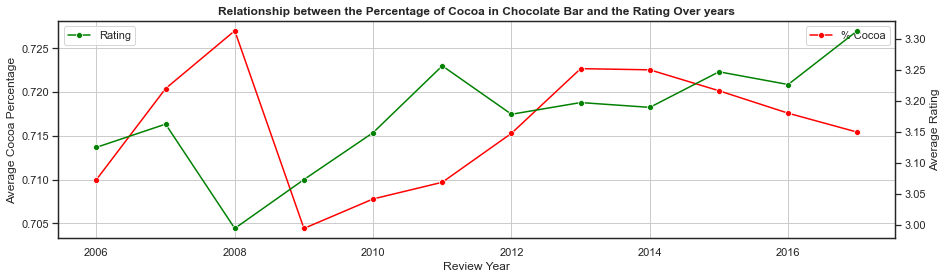

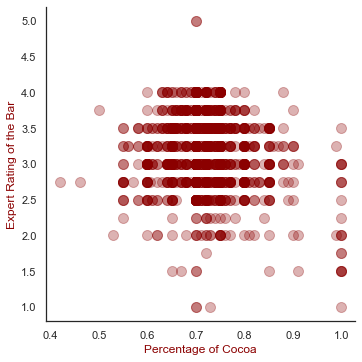

In [238]:
# Cocoa Percentage patterns and rating over the years
cols = ['review_date','cocoa_percent','rating']
relation_table = data[cols]

# group table by review year and Aggregate by mean rating and percentage of cocoa in bar
relation_table = relation_table.groupby('review_date').agg(
    cocoaPercent=pd.NamedAgg(column='cocoa_percent', aggfunc='mean'), 
    cocoaRating=pd.NamedAgg(column='rating', aggfunc='mean'))

# Reset Index
relation_table = relation_table.reset_index()

# rename columns
relation_table.columns=['Review Year','Average Cocoa Percentage', 'Average Rating']

# Print table
print(relation_table)

# visualizing of Cocoa Percentage and rating patterns over the years
sns.set(style='white')

plt.figure(figsize=(15, 4))
g1 = sns.lineplot(x='Review Year', y='Average Cocoa Percentage', data=relation_table, color="red",marker='o',label = '% Cocoa')

# Adding Twin Axes to plot using Average Rating
ax2 = plt.twinx()
g2 = sns.lineplot(x='Review Year', y='Average Rating', data=relation_table, color="green",marker='o',ax=ax2,label = 'Rating')

# Adding title
plt.title('Relationship between the Percentage of Cocoa in Chocolate Bar and the Rating Over years', fontweight ="bold") 

# Adding grid
g1.grid()

# Show plot
plt.show()

sns.lmplot(x='cocoa_percent',y='rating',fit_reg=False,scatter_kws={"color":"darkred","alpha":0.3,"s":100},data=data)
plt.xlabel('Percentage of Cocoa',size=12,color='darkred')
plt.ylabel('Expert Rating of the Bar',size=12,color='darkred')
plt.show()

###### Rating over the years (Taking the average amounts per year)
* The lowest ever average rating was around 3 and it came in 2008.
* Since then to 2011, there was a steady increase in average ratings and in 2011 it was at 3.26.
* From 2011 to 2017, there have been several fluctuations in the ratings, and in 2017 the rating lies at its apex at around 3.31.
* The Year 2008 - Year of Coincidence or something more than that?
    * The highest average cocoa percent was in 2008
    * The lowest average ratings came in 2008
* The next year 2009 saw two major changes from the previous year :
    * There was a drastic reduce in cocoa content on an average
    * The average rating across the world had an increase from 3.00 to 3.08 in 2008
    
###### Cocoa Percent versus Rating - Reading the Scatterplot above
* No evident correlation. A numerical correlation gives a weak negative correlation coefficient of -0.16
* The density of the graph is highest between 65% and 80% of cocoa
* Chocolate bars with low cocoa percentage(less than 50%) and high cocoa percentage(above 90%) are less in number, but the most important fact is that most of these chocolate bars have a rating of less than 3,i.e they have been deemed 'Unsatisfactory'
* Seems like people do not prefer very low or very high cocoa percentages in their chocolate!

###### From the scatter plot above, we can infer that it would not be a good idea to guess a chocolate's rating based on its Cocoa Percentage.



## 3.4. What are the top ten companies with the highest rating?

                      Company  Rating
0                        Soma      47
1                      Bonnat      27
2                      Fresco      26
3                      Pralus      25
4                    A. Morin      23
5                       Arete      22
6                    Guittard      22
7                      Domori      22
8                    Valrhona      21
9  Hotel Chocolat (Coppeneur)      19


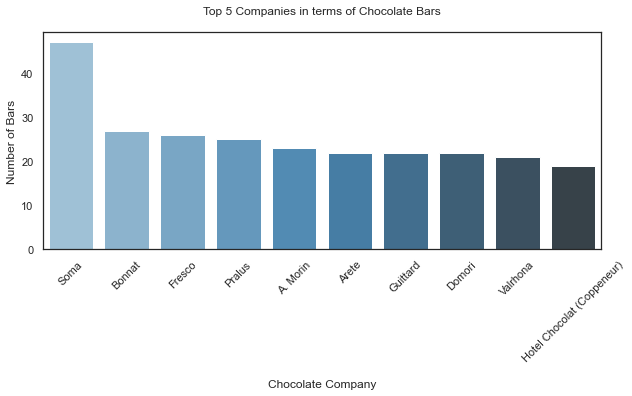

In [234]:
# Top 10 companies in terms of chocolate bars in this dataset
top10companies = data[['Company','rating']]
top10companies = top10companies['Company'].value_counts().sort_values(ascending=False).head(10)
top10companies = pd.DataFrame(top10companies)
top10companies.reset_index(level=0, inplace=True)
top10companies.columns=['Company','Rating']
print(top10companies)

# visualizing Top 10 companies
sns.set(style='white')
plt.figure(figsize=(10,4))
sns.barplot(x='Company', y='Rating', data=top10companies,palette="Blues_d")
plt.xlabel("\nChocolate Company")
plt.ylabel("Number of Bars")
plt.title("Top 5 Companies in terms of Chocolate Bars\n")
plt.xticks(rotation=45)
plt.show()

###### Soma has the highest number of chocolate bars in this dataset with 47 number of ratings.

 ## 3.5. What is the pattern over the years with respect to rating?

    review_date  cocoa_percent
0          2006       0.710000
1          2007       0.720390
2          2008       0.726989
3          2009       0.704431
4          2010       0.707793
5          2011       0.709697
6          2012       0.715282
7          2013       0.722663
8          2014       0.722530
9          2015       0.720140
10         2016       0.717580
11         2017       0.715417


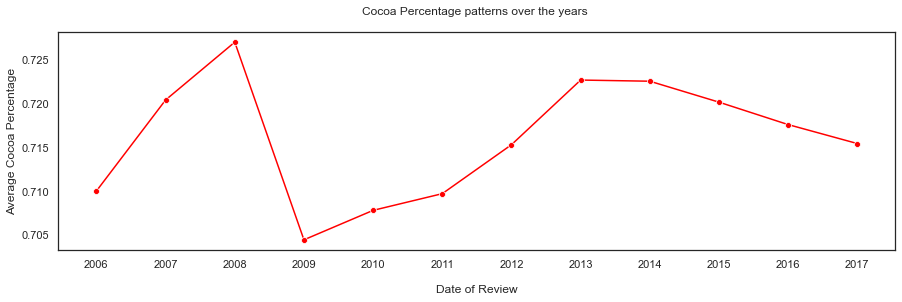

In [162]:
# Cocoa Percentage patterns over the years
cols = ['review_date','cocoa_percent']
cocoaPercent = data[cols]
cocoaPercent = data.groupby('review_date').aggregate({'cocoa_percent':'mean'})
cocoaPercent = cocoaPercent.reset_index()
print(cocoaPercent)

#visualizing of Cocoa Percentage patterns over the years
sns.set(style='white')
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='review_date', y='cocoa_percent', data=cocoaPercent, color="red",marker='o')
ax.set(xticks=cocoaPercent.review_date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Cocoa Percentage")
plt.title("Cocoa Percentage patterns over the years \n")
plt.show()

###### Percentage of Cocoa over the years (Taking the average amounts per year)
* The highest percentage of cocoa in a chocolate bar came in 2008 and was about 73%.
* The lowest percentage of cocoa followed in the very next year, 2009 and hit 69%.
* There was a steep rise in the amount of cocoa in chocolate from 2009 to 2013 where it rose to about 72.2% from 69%.
* From 2014, a steady decline in cocoa percentage in chocolate bars have been noticed and in 2017, it stands at just above 71.5%.

## 3.6 Which Countries produces the best chocolate bars?

Top Chocolate Producing Countries in the World

U.S.A.    764
France    156
Canada    125
U.K.       96
Italy      63
Name: company_location, dtype: int64


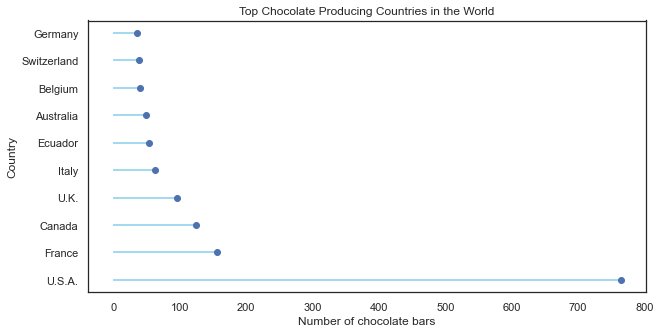

In [243]:
# Countries
print ('Top Chocolate Producing Countries in the World\n')
country=list(data['company_location'].value_counts().head(10).index)
choco_bars=list(data['company_location'].value_counts().head(10))
prod_ctry=dict(zip(country,choco_bars))
print(data['company_location'].value_counts().head())

plt.figure(figsize=(10,5))
plt.hlines(y=country,xmin=0,xmax=choco_bars,color='skyblue')
plt.plot(choco_bars,country,"o")
plt.xlabel('Number of chocolate bars')
plt.ylabel('Country')
plt.title("Top Chocolate Producing Countries in the World")
plt.show()

  Company Location  Number of Rating
0           U.S.A.                25
1           France                23
2           Canada                10
3            Italy                 9
4          Belgium                 6
5      Switzerland                 6
6             U.K.                 4
7        Australia                 4
8          Ecuador                 3
9            Spain                 3


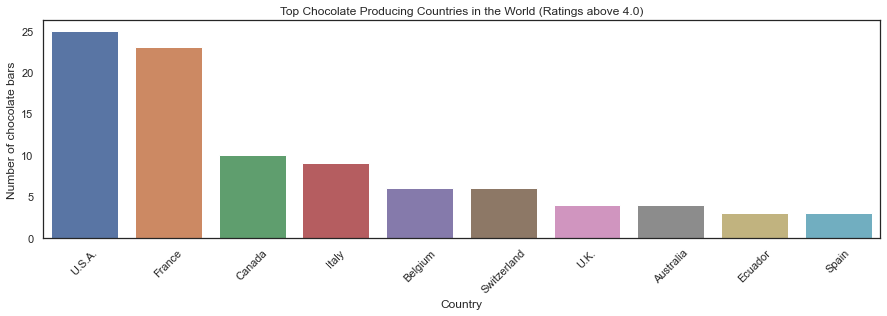

In [268]:
#create dataframe for company_location and rating
cols = ['company_location','rating']
best_choc_data = data[cols]

# countries with the rating >=4 
best_choc = best_choc_data[best_choc_data['rating']>=4]

# Top countries with most high ratings
best_choc = pd.DataFrame(best_choc['company_location'].value_counts()).head(10)

# Make index (specific_bean_origin_or_bar_name) a column
best_choc.reset_index(level=0, inplace=True)

# rename columns
best_choc.columns=['Company Location','Number of Rating']

print(best_choc)

   
# Code to visualize the countries that produce the best choclates
sns.set(style='white')
plt.figure(figsize=(15, 4))
sns.barplot(x="Company Location", y="Number of Rating",data=best_choc)
plt.xlabel('Country')
plt.ylabel('Number of chocolate bars')
plt.title("Top Chocolate Producing Countries in the World (Ratings above 4.0)")
plt.xticks(rotation=45)

plt.show()


###### U.S.A produces way more chocolate companies than any other country has according to this data

## 3.7 Which chocolate beans have the highest ratings?

             Bean Type  Number of Rating
0           Trinitario                26
1              Criollo                14
2                Blend                 6
3  Criollo, Trinitario                 4
4            Forastero                 4


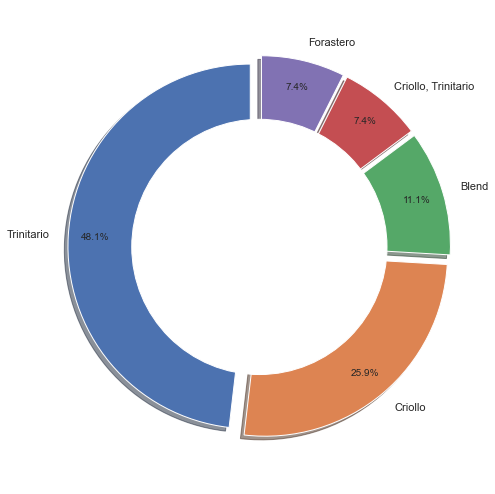

In [278]:
# Repla all None with NaN
data.replace(to_replace=['None'], value=np.nan, inplace=True)

#create dataframe for bean_type and rating
cols = ['bean_type','rating']
bean_data = data[cols]

# countries with the rating >=4 
best_bean = bean_data[bean_data['rating']>=4]

# Top countries with most high ratings
best_bean = pd.DataFrame(best_bean['bean_type'].value_counts()).head(5)

# Make index (specific_bean_origin_or_bar_name) a column
best_bean.reset_index(level=0, inplace=True)

# rename columns
best_bean.columns=['Bean Type','Number of Rating']

print(best_bean)

   
# Code to visualize the countries that produce the best choclates
sizes = best_bean['Number of Rating'].to_list()
label_names = best_bean['Bean Type'].to_list()
          
# Now let's make the donut plot
explode = (0.05,0.05,0.05,0.05,0.05)
my_circle=plt.Circle((0,0),0.7,color='white')
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=label_names,explode=explode,autopct='%1.1f%%',pctdistance=0.85,startangle=90,shadow=True)
fig=plt.gcf()
fig.gca().add_artist(my_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()


######  
* This donut plot affirms that Trinitario is the best cocoa bean among the top rated beans.
* 75% of the chocolate bars in the study belong to 'Above Satisfactory'('premium and elite' are also a part of this category).
* And, 25% of the chocolate bars that have been rated have ratings under 3.0.